# Handwriting Recognition Using Keras API

## Data Generator

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import *
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [2]:
x_train = np.load("X.npy")
y_train = np.load("Y.npy")

In [3]:
print(x_train.shape,y_train.shape)

(96454, 32, 128, 1) (96454,)


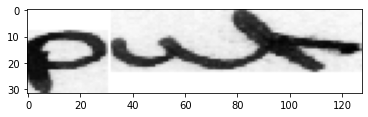

put


In [4]:
plt.imshow((x_train[22]/255.0),cmap='gray')
plt.show()
print(y_train[22])

In [5]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_train = to_categorical(y_train, dtype='float32')

In [6]:
split = 0.8
m = int(x_train.shape[0]*split)
X = x_train[:m]
x_val = x_train[m:]
Y = y_train[:m]
y_val = y_train[m:]

In [7]:
(X.shape,Y.shape),(x_val.shape,y_val.shape)

(((77163, 32, 128, 1), (77163, 12209)), ((19291, 32, 128, 1), (19291, 12209)))

In [8]:
datagen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    
)
valgen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2
)

In [9]:
datagen.fit(X)
valgen.fit(x_val)

In [10]:
model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(32,128,1)))
model.add(Convolution2D(filters= 32, kernel_size =(5,5), strides= (2,2), padding='same', name='conv1')) #96
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool1'))

model.add(Convolution2D(filters= 64, kernel_size =(3,3), strides= (1,1), padding='same', name='conv2'))  #256
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool2'))

model.add(Convolution2D(filters= 128, kernel_size =(3,3), strides= (1,1), padding='same', name='conv3'))  #256
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool3'))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(512, name='dense1'))  #1024
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256, name='dense2'))  #1024
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(12209,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 34, 130, 1)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 17, 65, 32)        832       
_________________________________________________________________
activation (Activation)      (None, 17, 65, 32)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 8, 32, 32)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 8, 32, 64)         18496     
_________________________________________________________________
activation_1 (Activation)    (None, 8, 32, 64)         0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 4, 16, 64)         0

In [12]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
hist = model.fit(
    datagen.flow(X, Y, batch_size=32),
    epochs=40,
    steps_per_epoch=8,
    validation_data=(valgen.flow(x_val, y_val, batch_size=32))
)

Epoch 1/40
8/8 [==============================] - 21s 3s/step - loss: 9.2815 - accuracy: 0.0195 - val_loss: 8.7195 - val_accuracy: 0.0406
Epoch 2/40
8/8 [==============================] - 19s 2s/step - loss: 8.4858 - accuracy: 0.0508 - val_loss: 7.9067 - val_accuracy: 0.0406
Epoch 3/40
8/8 [==============================] - 19s 2s/step - loss: 7.8533 - accuracy: 0.0469 - val_loss: 7.7252 - val_accuracy: 0.0187
Epoch 4/40
8/8 [==============================] - 21s 3s/step - loss: 7.7317 - accuracy: 0.0352 - val_loss: 7.5863 - val_accuracy: 0.0406
Epoch 5/40
8/8 [==============================] - 21s 3s/step - loss: 7.6606 - accuracy: 0.0547 - val_loss: 7.4906 - val_accuracy: 0.0406
Epoch 6/40
8/8 [==============================] - ETA: 0s - loss: 7.6966 - accuracy: 0.0508

KeyboardInterrupt: 

In [14]:
plt.figure(0)
plt.style.use("seaborn")
plt.plot(hist.history["loss"], "g", label="loss")
plt.plot(hist.history["val_loss"], "b", label="val_loss")
plt.plot(hist.history["accuracy"], "r", label="acc")
plt.plot(hist.history["val_accuracy"], "y", label="val_acc")
plt.legend()
plt.show()

NameError: name 'hist' is not defined